1. 載入MNIST資料集

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

2. 利用OpenCV讀取第一張圖

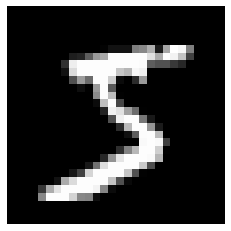

In [2]:
#!pip install opencv-python

import cv2
from matplotlib import pyplot as plt

# 讀取第一張圖像
first_image = X_train[0]

# 顯示圖像
plt.imshow(first_image, cmap='gray')  # cmap='gray'表示使用灰度顏色映射
plt.axis('off')  # 不顯示坐標軸
plt.show()

3. 利用OpenCV Canny演算法顯示第一張圖的邊緣檢測結果

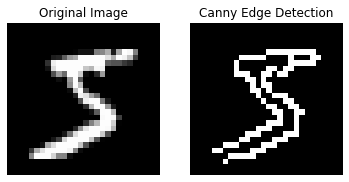

In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# 讀取第一張圖像
first_image = X_train[0]

# 將圖像轉換為灰度
gray_image = cv2.cvtColor(first_image, cv2.COLOR_GRAY2BGR)  # 修改這裡

# 使用Canny邊緣檢測
edges = cv2.Canny(gray_image, 50, 150)

# 顯示原始圖像和邊緣檢測結果
plt.subplot(121), plt.imshow(gray_image, cmap='gray')
plt.title('Original Image'), plt.axis('off')

plt.subplot(122), plt.imshow(edges, cmap='gray')
plt.title('Canny Edge Detection'), plt.axis('off')

plt.show()

4. 建立一個3層CNN(max polling)的分類器，分類MNIST圖片

In [23]:
import tensorflow as tf
from tensorflow.keras import layers, models

# 載入MNIST資料集
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# 正規化圖像數據
x_train, x_test = x_train / 255.0, x_test / 255.0

# 增加一個維度，將數據形狀從 (28, 28) 改為 (28, 28, 1)
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))

# 建立CNN模型
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# 在模型上添加密集層，進行分類
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))  # 10個類別，輸出層使用softmax激活函數

# 編譯模型
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 訓練模型
model.fit(x_train, y_train, epochs=3, validation_data=(x_test, y_test))

# 評估模型
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc}')

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 576)              

5. 預測一張手寫數字圖片的結果

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
import cv2
import numpy as np

# 讀取手寫數字圖片
image = cv2.imread('number3.png', cv2.IMREAD_GRAYSCALE)

# 正規化並調整形狀
image = image / 255.0
image = cv2.resize(image, (28, 28))  # 將圖片調整為模型的輸入尺寸

# 添加一個維度
image = np.expand_dims(image, axis=0)
image = np.expand_dims(image, axis=-1)

# 使用模型進行預測
predictions = model.predict(image)

# 解釋預測結果
predicted_class = np.argmax(predictions)

print(f'Predicted Class: {predicted_class}')